In [1]:
import requests
import pandas as pd
import yfinance as yf


url = "https://en.wikipedia.org/wiki/List_of_S%26P_600_companies" 


def read_html_from_website(url):
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        
        # Check if request was successful
        if response.status_code == 200:
            # Extract HTML content from the response
            html_content = response.text
            return html_content
        else:
            print("Failed to retrieve HTML. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# # # Create 

html_content = read_html_from_website(url)
list_df = pd.read_html(html_content)
df = list_df[0]
df = df.drop(columns=["SEC filings","CIK"])
df = df.dropna()
df = df.head(30)
df


,Symbol,Company,GICS Sector,GICS Sub-Industry,Headquarters Location
0,AAON,"AAON, Inc.",Industrials,Building Products,"Tulsa, Oklahoma"
1,AAP,"Advance Auto Parts, Inc.",Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina"
2,AAT,American Assets Trust,Real Estate,Diversified REITs,"San Diego, California"
3,ABCB,Ameris Bancorp,Financials,Regional Banks,"Atlanta, Georgia"
4,ABG,Asbury Automotive Group,Consumer Discretionary,Automotive Retail,"Duluth, Georgia"
5,ABM,"ABM Industries, Inc.",Industrials,Environmental & Facilities Services,"New York City, New York"
6,ABR,Arbor Realty Trust,Financials,Mortgage REITs,"Uniondale, New York"
7,ACA,"Arcosa, Inc.",Industrials,Industrial Machinery,"Dallas, Texas"
8,ACIW,ACI Worldwide,Information Technology,Application Software,"Miami, Florida"
9,ACLS,"Axcelis Technologies, Inc.",Information Technology,Semiconductor Equipment,"Beverly, Massachusetts"


In [2]:
df['Invested Capital'] = df.apply(lambda x: yf.Ticker(x['Symbol']).balance_sheet.T['Invested Capital'].iloc[0], axis=1)
df['Total Debt'] = df.apply(lambda x: yf.Ticker(x['Symbol']).balance_sheet.T['Total Debt'].iloc[0], axis=1)
df["Gardiner's Ratio"] = df['Invested Capital'] / df['Total Debt']



df

,Symbol,Company,GICS Sector,GICS Sub-Industry,Headquarters Location,Invested Capital,Total Debt,Gardiner's Ratio
0,AAON,"AAON, Inc.",Industrials,Building Products,"Tulsa, Oklahoma",6.317180e+08,7.225800e+07,8.742534
1,AAP,"Advance Auto Parts, Inc.",Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",4.051564e+09,3.651601e+09,1.109531
2,AAT,American Assets Trust,Real Estate,Diversified REITs,"San Diego, California",2.869353e+09,1.673764e+09,1.714312
3,ABCB,Ameris Bancorp,Financials,Regional Banks,"Atlanta, Georgia",5.201458e+09,2.004058e+09,2.595463
4,ABG,Asbury Automotive Group,Consumer Discretionary,Automotive Retail,"Duluth, Georgia",6.350100e+09,3.688800e+09,1.721454
5,ABM,"ABM Industries, Inc.",Industrials,Environmental & Facilities Services,"New York City, New York",3.111200e+09,1.442600e+09,2.156662
6,ABR,Arbor Realty Trust,Financials,Mortgage REITs,"Uniondale, New York",1.244142e+10,1.013811e+10,1.227193
7,ACA,"Arcosa, Inc.",Industrials,Industrial Machinery,"Dallas, Texas",2.735000e+09,5.506000e+08,4.967308
8,ACIW,ACI Worldwide,Information Technology,Application Software,"Miami, Florida",2.283059e+09,1.135000e+09,2.011506
9,ACLS,"Axcelis Technologies, Inc.",Information Technology,Semiconductor Equipment,"Beverly, Massachusetts",6.672560e+08,4.641400e+07,14.376180


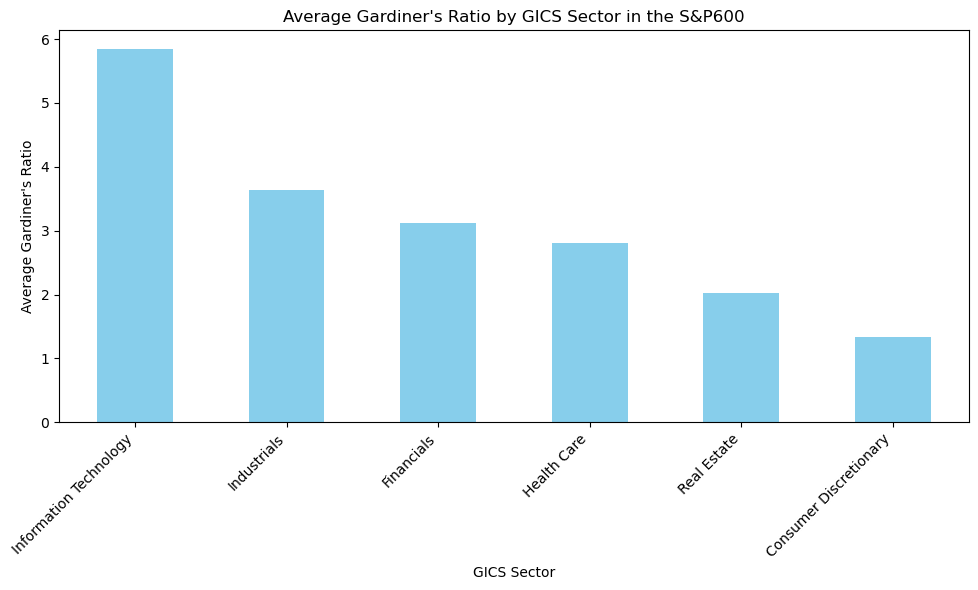

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "GICS Sector" and "Gardiner's Ratio"

# Grouping the DataFrame by "GICS Sector" and calculating the average of "Gardiner's Ratio"
sector_avg = df.groupby('GICS Sector')["Gardiner's Ratio"].mean()

sector_avg = sector_avg.sort_values(ascending=False)


# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sector_avg.plot(kind='bar', color='skyblue')
plt.title("Average Gardiner's Ratio by GICS Sector in the S&P600")
plt.xlabel('GICS Sector')
plt.ylabel("Average Gardiner's Ratio")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('plot.png')

plt.show()